# Creating Manipulation Station in a Robot Library

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

#Drake utils
from pydrake.all import (
    Parser,
    RigidTransform,
    Simulator,
    MultibodyPlant,
    DiagramBuilder,
    ModelVisualizer,
)
from pydrake.geometry import Meshcat
from manipulation.utils import ConfigureParser
from manipulation import running_as_notebook

# Own utils
from hwstation.utils import setup_builder, plot_and_simulate, visualize_diagram
from hwstation.add_objects import get_library_scenario_data

## 1. Run simulation

In [2]:
# Start meshcat
try:
    meshcat = Meshcat(7006)
except:
    pass #This error appears if this cell is executed twice (port 7006 is already taken then)

# Get string describing scenario
scenario_data = get_library_scenario_data()

#Setting up all drake simulation objects:
builder, plant, scene_graph, station, parser, scenario = setup_builder(meshcat, scenario_data=scenario_data)

#Simulate environment (right now, only the books fall on the table)
diagram, plant_context, simulator = plot_and_simulate(meshcat, builder, plant, station, time_end=0.0)


INFO:drake:Meshcat listening for connections at http://localhost:7006
==== LCM Warning ===
LCM detected that large packets are being received, but the kernel UDP
receive buffer is very small.  The possibility of dropping packets due to
insufficient buffer space is very high.

For more information, visit:
   http://lcm-proj.github.io/lcm/multicast_setup.html



## 2. Visualize diagram

udp_read_packet -- select:: Interrupted system call


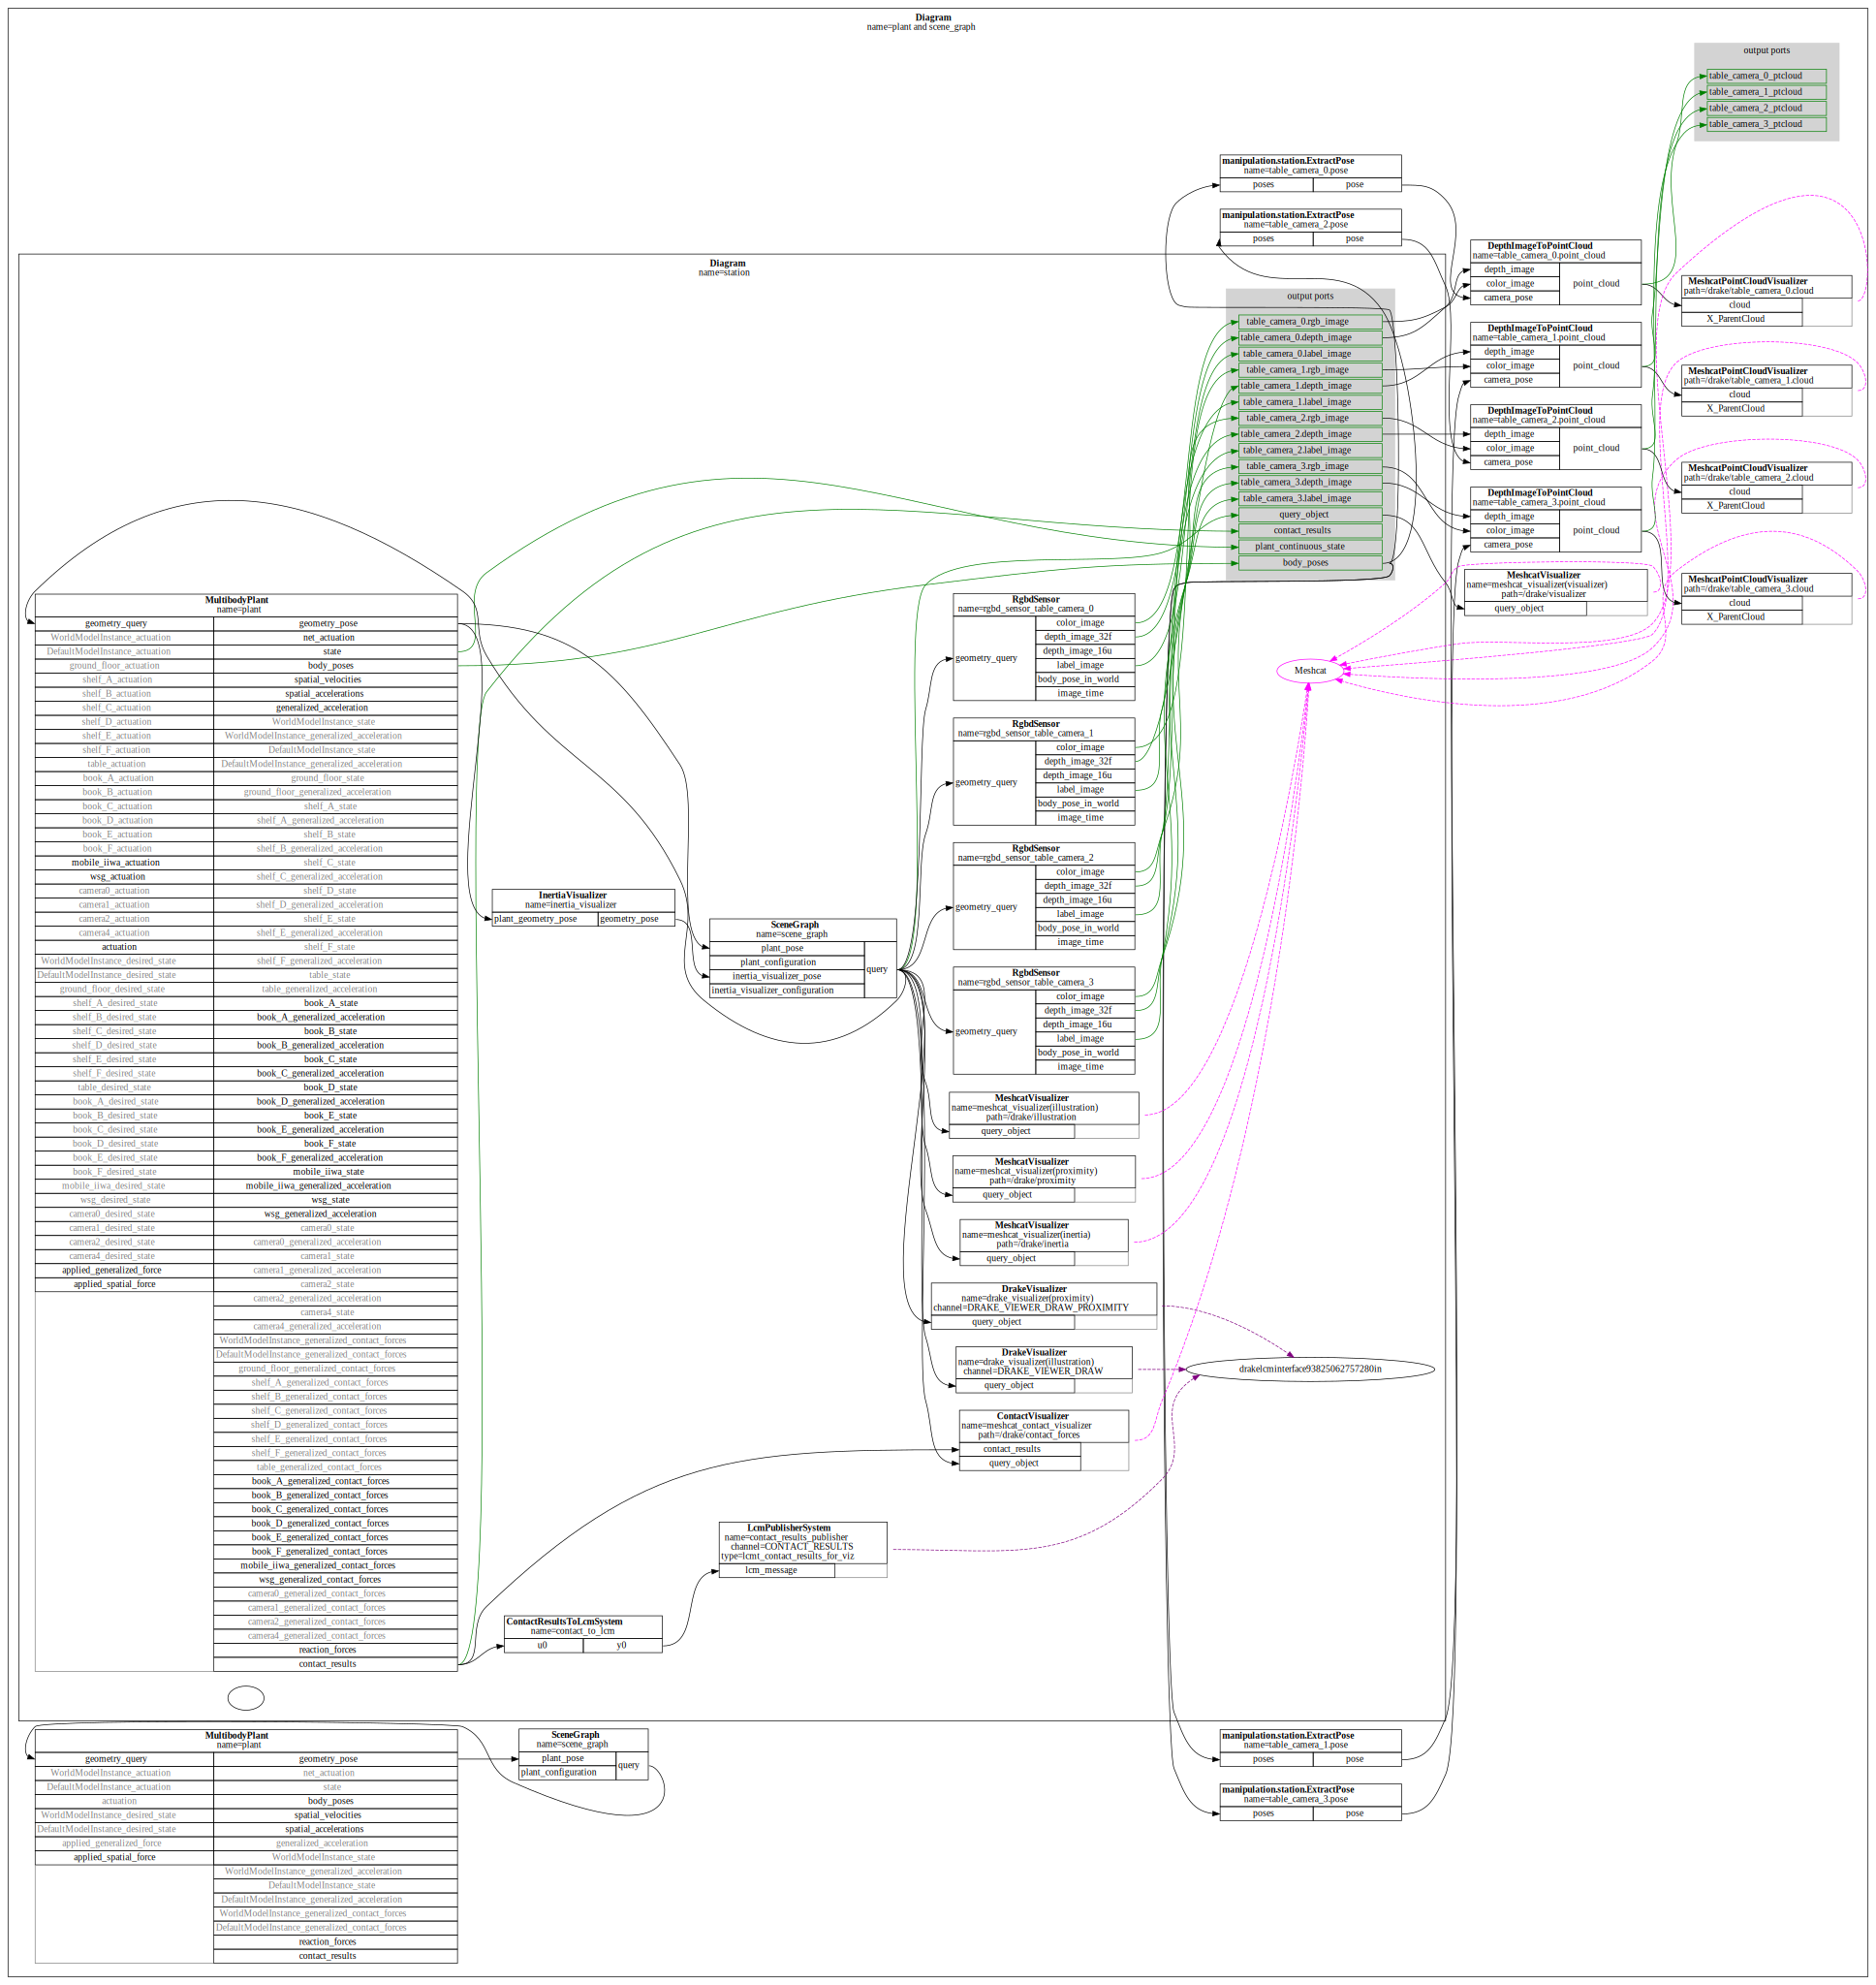

In [4]:
visualize_diagram(diagram)

## 3. Plot camera views

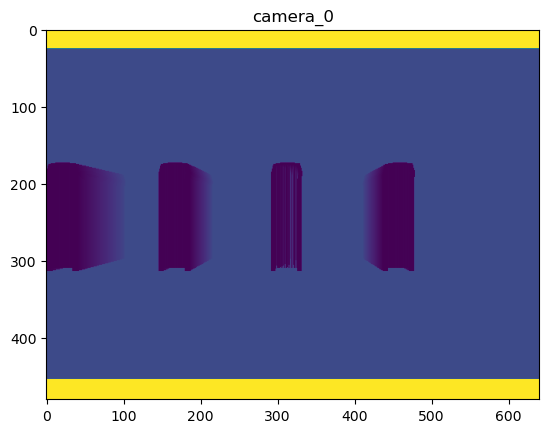

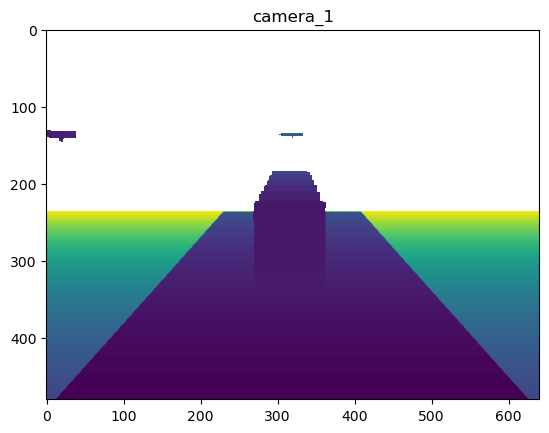

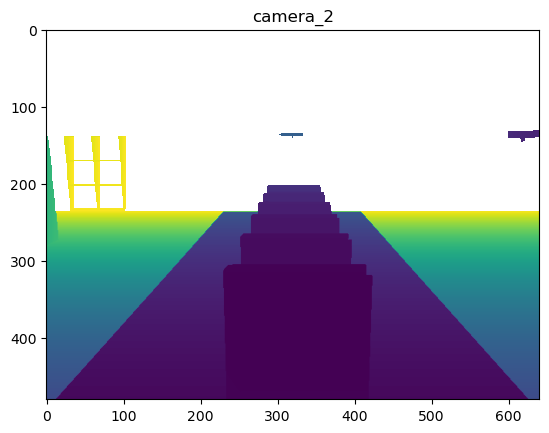

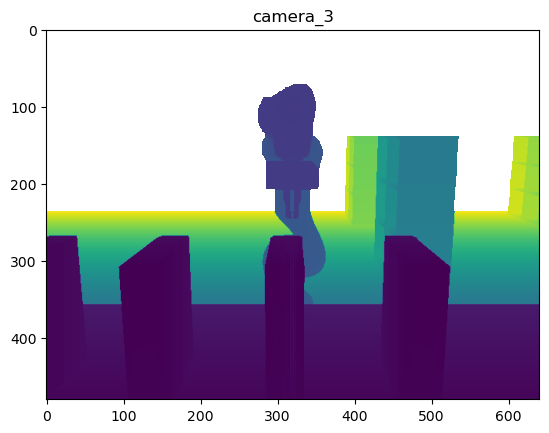

In [5]:
for camera_idx in range(4):
    context = station.CreateDefaultContext()
    depth_image = station.GetOutputPort(f"table_camera_{camera_idx}.depth_image").Eval(context)
    plt.imshow(depth_image.data)
    plt.title(f"camera_{camera_idx}")
    plt.show()

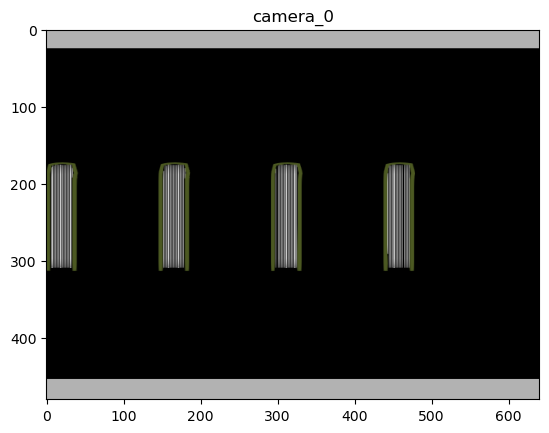

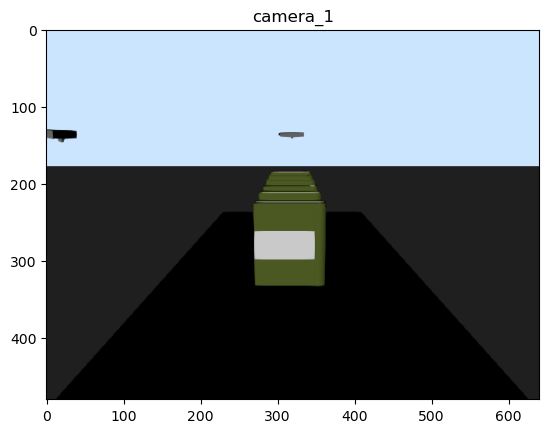

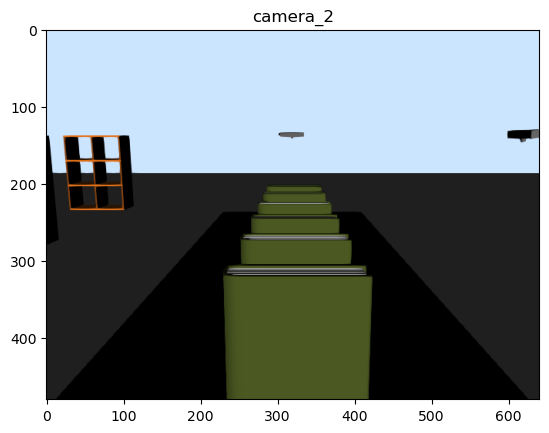

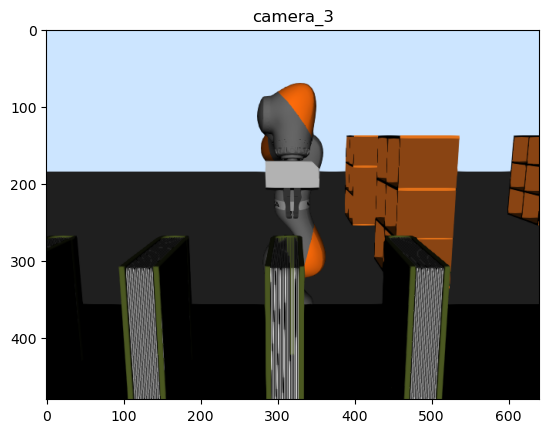

<Figure size 640x480 with 0 Axes>

In [6]:
for camera_idx in range(4):
    context = station.CreateDefaultContext()
    depth_image = station.GetOutputPort(f"table_camera_{camera_idx}.rgb_image").Eval(context)
    plt.imshow(depth_image.data)
    plt.title(f"camera_{camera_idx}")
    plt.show()
    plt.savefig(f"{camera_idx}.jpg")